 

# Baseball Pitch Prediction




## Background
*The Cheating Scandal*

In early 2020, it was revealed that the Houston Astros had employed a cheating system in previous years in which hitters would be tipped off to what pitch would be thrown by the opposing hitter. 
> - The method employed was fairly crude, where a camera in centerfield would relay the signs a catcher uses to the hitting team's dugout, and the dugout would in turn relay the sign to the hitter using some form of audio cue.

These included a distinctive whistle sound, as well as simply banging on a trashcan with a bat to signify whether a pitch would be a fastball or breaking ball. Despite its primitive nature, the scheme ultimately yielded positive results for the Astros, including the 2017 World Series (baseball's equivalent of the Super Bowl). 

## **Goal**

We wanted to see if one could use machine learning to predict what pitch would be thrown, without having to cheat. Thus, it was of utmost importance for our model to only have access to information that would be openly availible to a hitter/hitting team before a pitch was thrown. For those unfamiliar with baseball, it is perfectly fine for a team to give signs to a hitter before a pitch is thrown (i.e. to take the pitch, swing, etc). The cheating occured during the process of actually stealing the signs used by the pitcher and catcher. 

I'll tell you right off the bat that the metrics of our modeling were not very impressive. Nevertheless, the techniques employed provided valuable insight into related problems ML may be more suited to answer, as well as providing general experience working with classifiers. 

# Data
We used a dataset from Kaggle which included 4 csv files, each covering a different aspect of the data availible on the official MLB website.

- At Bats
- Pitches, 
- Games 
- Players 

This covered the years 2015-2018. In total, our raw data included 40 features of 2.85 million pitches, 11 features of 740,000 at-bats, 17 features on 9719 games, and 3 features for 2218 players. 

The first priority was working the data down to a more manageable size. Moreover, as mentioned earlier, the data would have to reflect only information that would be legally availible to the hitting team before the pitch. 
>This ruled out any of the kinetic measures of the actual pitch such as velocity, spin rate, and break angle which was stored alongside features such as the balls/strikes count, number of outs, etc..., which we did want to keep. 

Thus, the majority of the data wrangling was spent filtering and merging the features present in each file that would be relevant to our study. 

### **Creating a workable subset**

We needed to decide which information to extract from the raw csv files to create a working dataframe. Using the entirety of the dataset for all pitchers was computationally unfeasable, but only focusing on a single individual wouldn't leave us with enough data to comfortably test and compare model performance.

We decided to focus on a selected group of pitchers who each had thrown a lot of innings in the years we had data for. 
I selected the pitchers listed on mlb.com's list of top 10 starting pitchers in the 2010's, excluding the 3 who missed significant time due to injury in the years we will look at. This left us with 7: Clayton Kershaw, Max Scherzer, Zack Greinke, Justin Verlander, Chris Sale, Jon Lester, and Jacob DeGrom. 

> https://www.mlb.com/news/top-10-starting-pitchers-of-the-2010s  
> *Here is the top 10 list. Do you agree with their choices?*

One of the factors driving the decision to focus on starting pitchers was that they are typically required to have a more diverse pitch repoitoire than relief pitchers who only pitch for an inning or 2. This would allow us to gain experience with a multiclass classification problem.

> One alternative idea that could be implemented is grouping the pitches by fastball vs off speed pitches, yielding a binary classification. 


*The techniques employed to merge and subset the data can be found in the Data Wrangling notebook.*



# Exploratory Data Analysis
Our main focus was to gain a better idea of the distribution of the different pitch types present in our target feature data.  It was immediately clear that the four-seam fastball (FF) was by far the most common pitch thrown. The full key for what pitch each code represents is availible at the end of the notebook. 


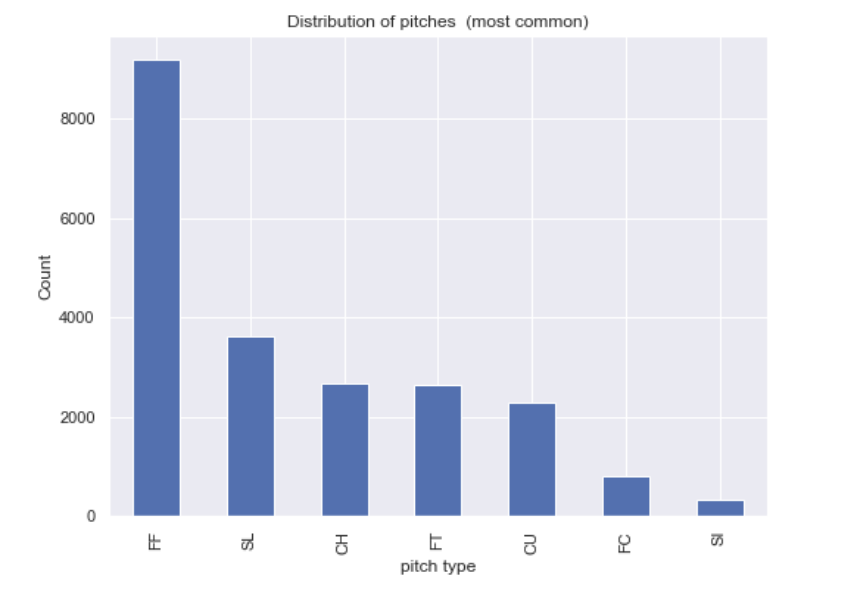 
 

    FF (Four Seam Fastball):    9201
    SL (Slider):   3637
    CH (Changeup):   2667
    FT (Two Seam Fastball):    2635
    CU (Curve):    2282
    FC (Cut Fastball):    814
    SI (Sinker):    344




We wanted to gain a visual perspective of how this distribution changed depending on various scenarios in a game. For those familiar with the sport, many of these scenarios are recognizable as things commentators discuss and use to speculate pitches during game broadcasts.



### Balls & Strikes

> 3 strikes and you're out. On the other hand, if the pitcher throws 4 balls, the batter gets a free trip to first base.  

One can see that in counts favoring the pitcher (0 balls 2 strikes, 1 ball 2 strikes etc), it is more common to see pitchers throw a more diverse selection of pitches (sliders, curveballs etc). With counts favoring the hitter (2+ balls, 0 strikes etc), pitchers throw the fastball more often to avoid walking batters (throwing 4 balls which puts the hitter on first base) as it is easier to control.

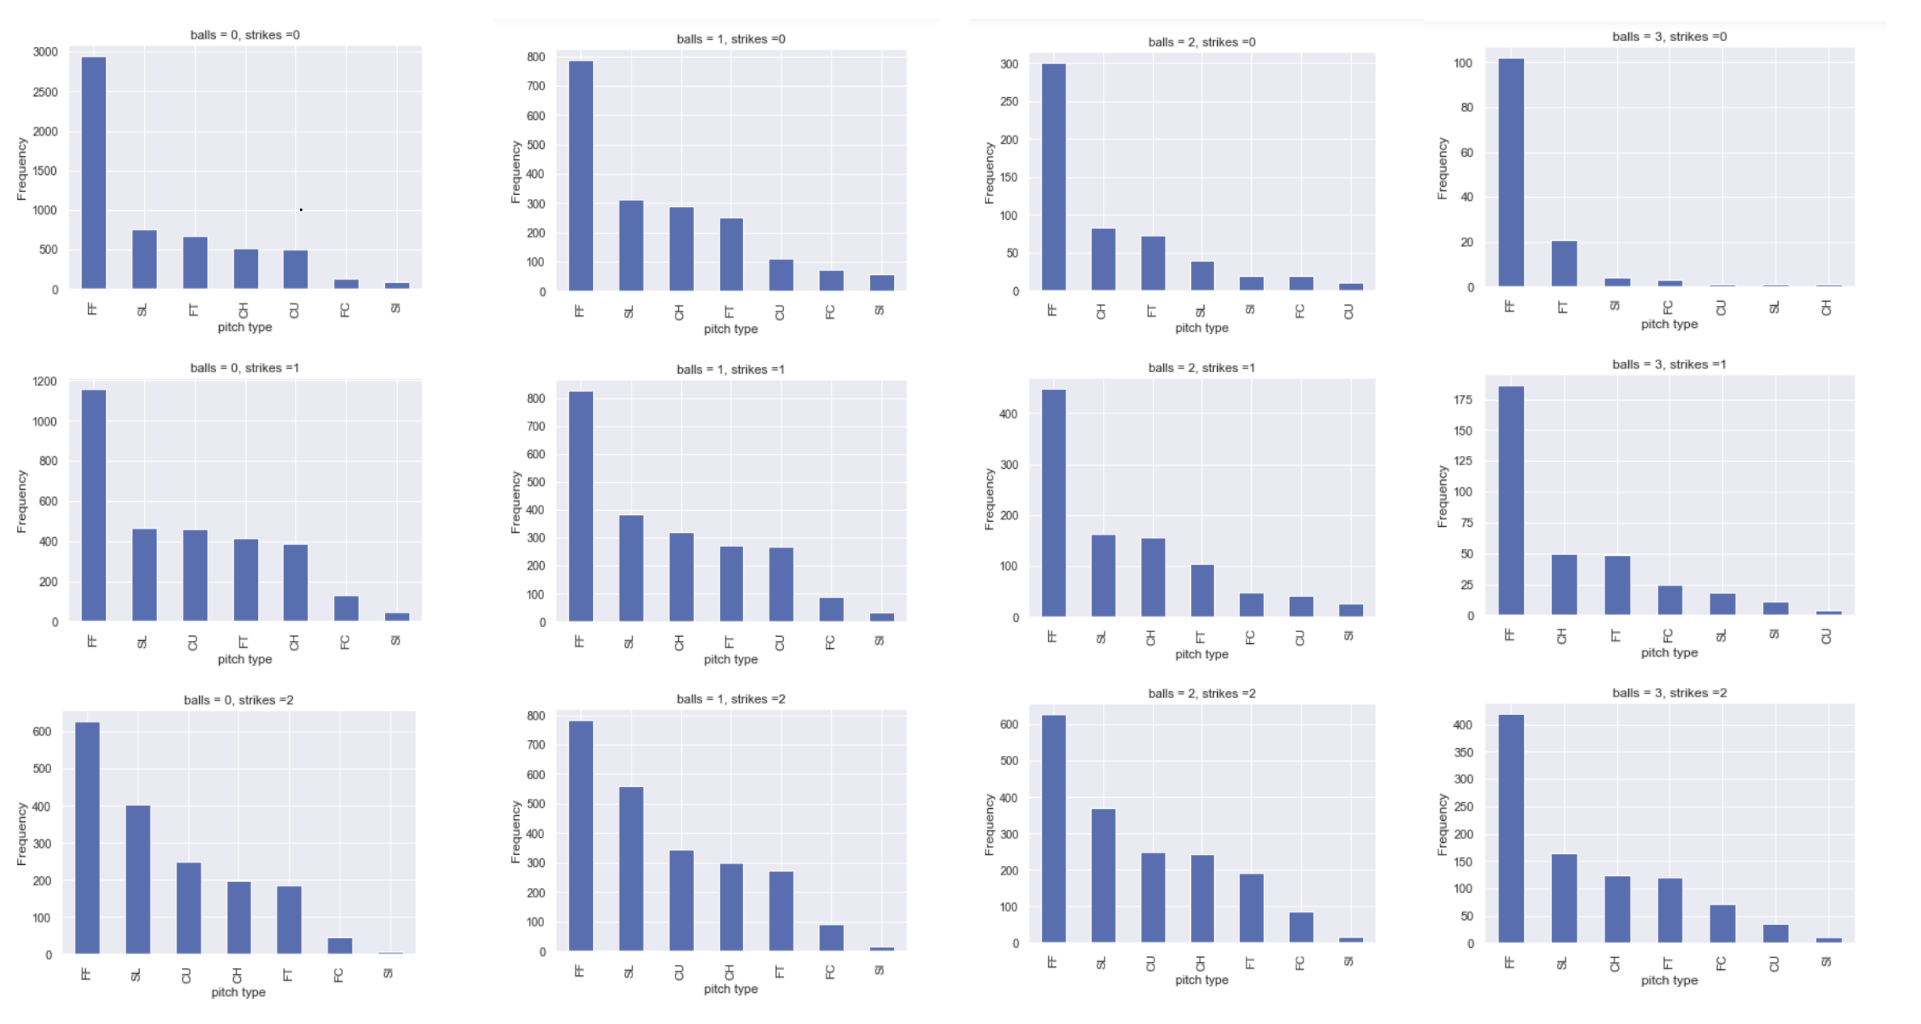


###  Baserunners & Outs 


For example, with the bases loaded (runners on first, second, and third), a pitcher may be less likely to throw breaking pitches which could end up outside of the strike zone, as a walk (4 balls) would result in a run being scored. Alternatively, if there are less than 2 outs and runners in scoring position (second or third base), a pitcher may be more inclined to throw breaking pitches to induce swings and misses. In this scenario, the negatives of allowing another runner on base (via a walk) could be outweighed by the positives of striking the batter out, as any hit would likely result in a run, and if a fast runner is on third, he will likely score on any kind of contact (even if it results in an out). I.e. a sacrifice fly or groundout which doesn't end the inning. 

Below are the distributions of pitches for each of the 8 runners-on-base scenarios. 



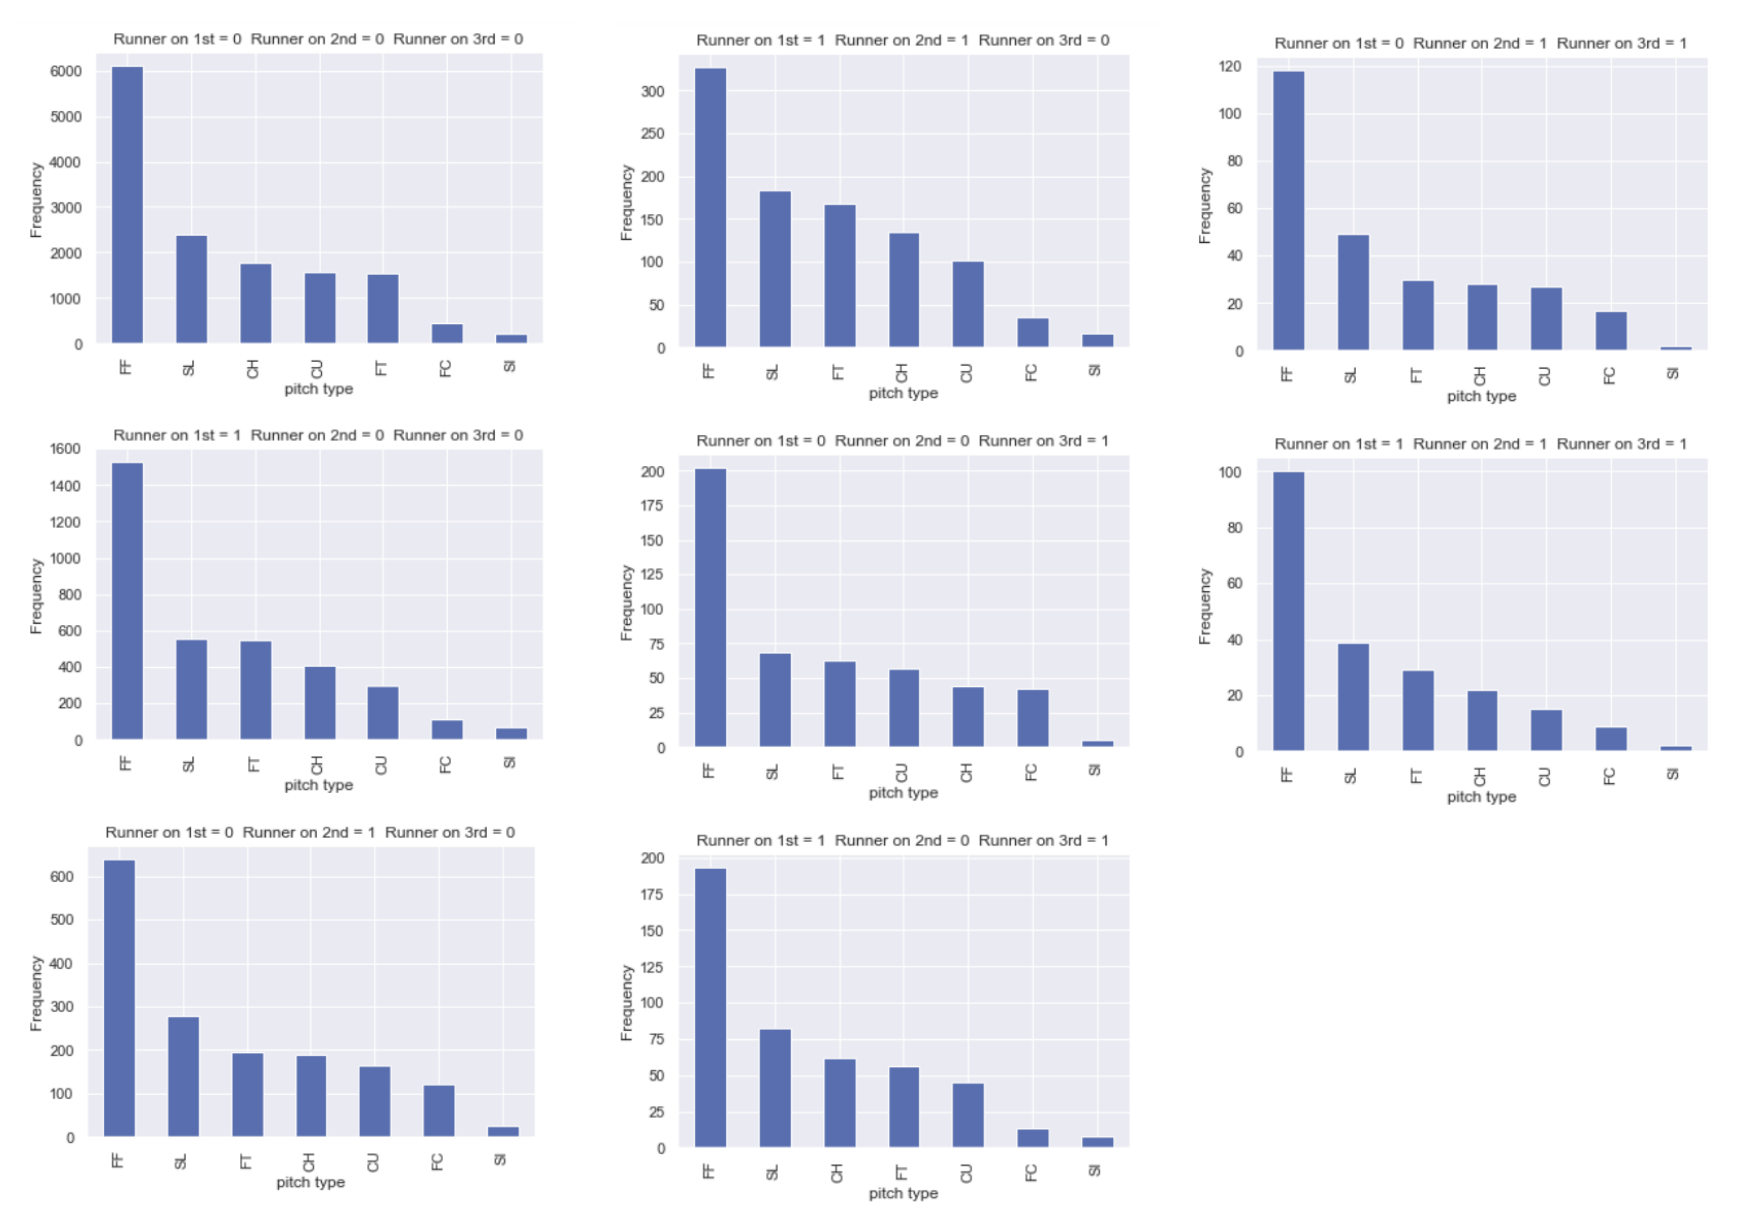


### Pitches by Inning




While the sample size becomes drastically smaller for the later innings, we can see some trends in that the pitches become more closely distributed. Conceptually, this makes sense because as a pitcher faces a lineup for the 3rd or even 4th time, they tend to diversify their repertoir depending on how the game has played out. 

Another (more even niche idea?) is that the way baseball is currently played and managed (with analytics driving many decisions), it is increasingly rare for a starting pitcher to pitch more than 7 innings. So, starters only pitch into the 8th and 9th innings if they are having a very dominant outing, perhaps even chasing a complete game shutout, no hitter, or perfect game. Having such an outing typically comes with the pitcher feeling confident with their entire arsenal of pitches.





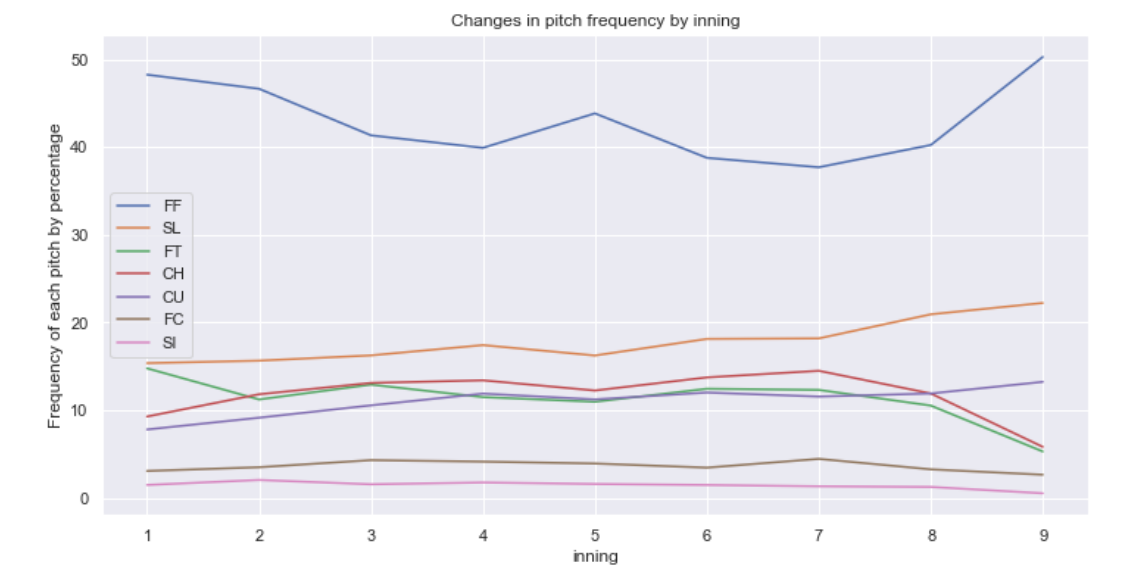

### Right or Left Handed?

Another major factor in pitcher batter matchups comes from the handedness of the 2 players. The general consensus is that pitchers fare better against batters of the same dominant hand (i.e. right handed pitcher vs right handed batter). When a batter stands opposite the pitchers throwing arm (i.e right handed pitcher vs left handed batter), in general, the batter is able to see the ball release from the pitchers hand at a clearer angle. This is exagerated with pitchers that are tall/lanky or have unorthodox deliveries, as the ball is essentially seen to be starting from behind the batter's head. 

One pitcher notorious for dominating same sided hitters was the lefty Randy Johnson, who stood 6 ft 10 inches and threw fastballs at over 100 MPH. In the 1997 all star game, left handed slugger Larry Walker (a left hander) put his helmet on backwards and hit as a right hander against Johnson. It was mostly done for comedy, but is still a fun example of the differences that stance can make in a matchup. 












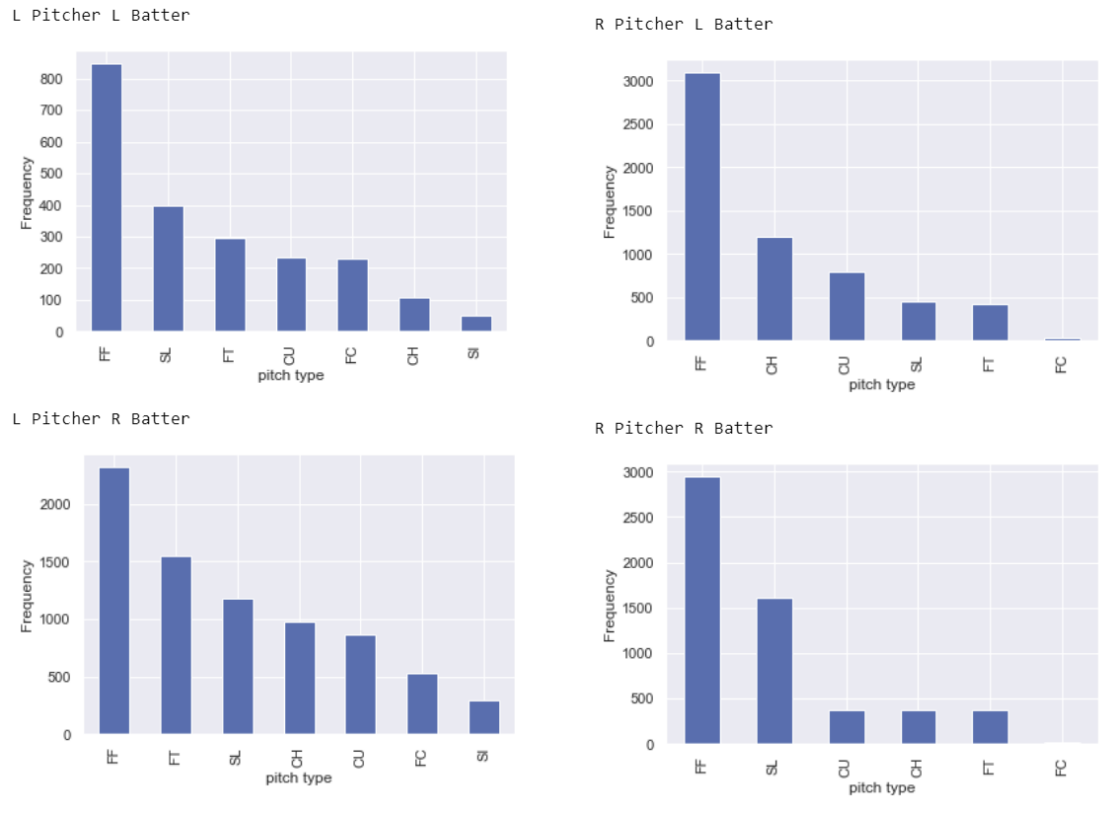

# Modeling
For now we will use accuracy as our main metric, while also looking at f1, roc_auc_score, recall and precision. For the latter measures, I felt a weighted average would be more informative than a micro or macro average. This isn't based on any strong backing so maybe this will be changed in the future. Another note is that due to the nature of the project, we don't have an particular need to worry about false positives or false negatives more than one another, the way we would for something involving medicine or other higher stakes scenarios. 

### Dummy Classifier
Lets start by creating a dummy classifier set to always predict the most frequent classification (4 seam fastball, labeled FF, which occurs 42.5% of the time).

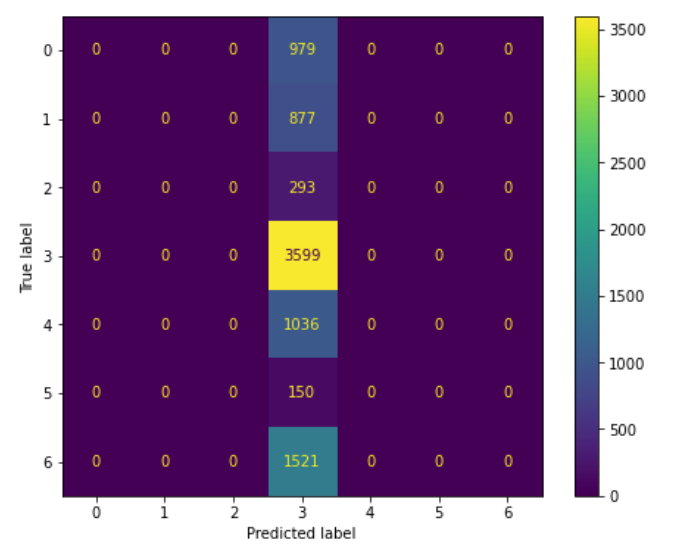

### Logistic Regression Classifier
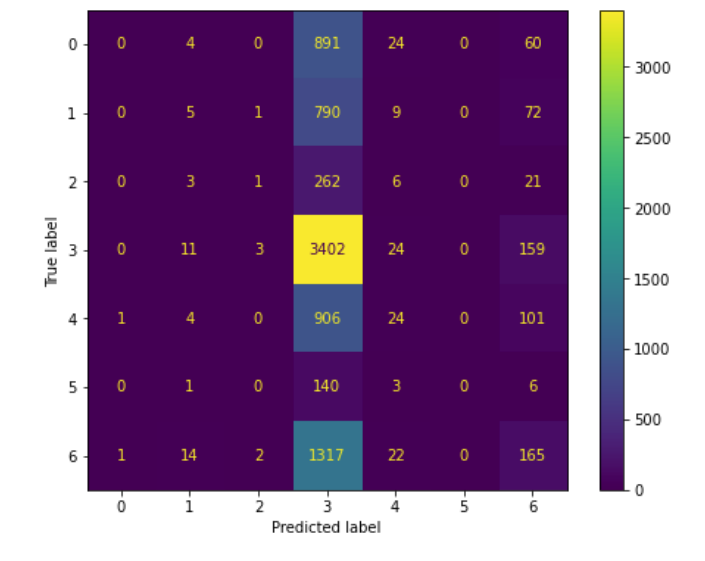

### Decision Tree Classifier
*Accuracy: 32.7%*

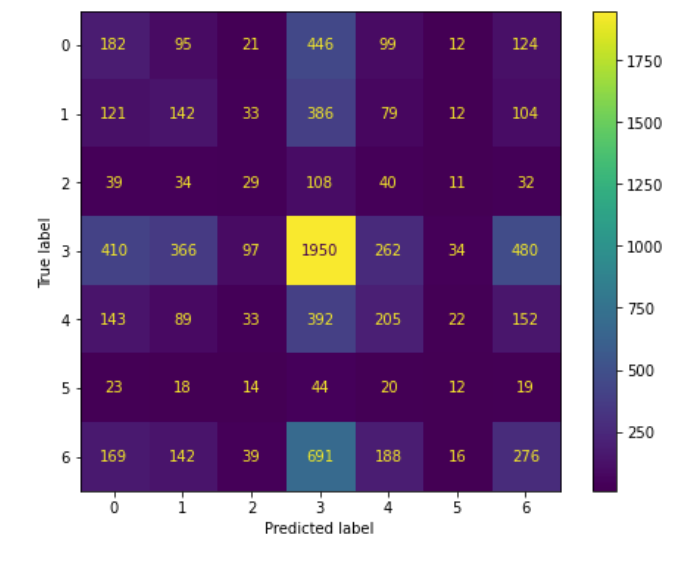

### Random Forest Classifier
*Accuracy: 36.4%*

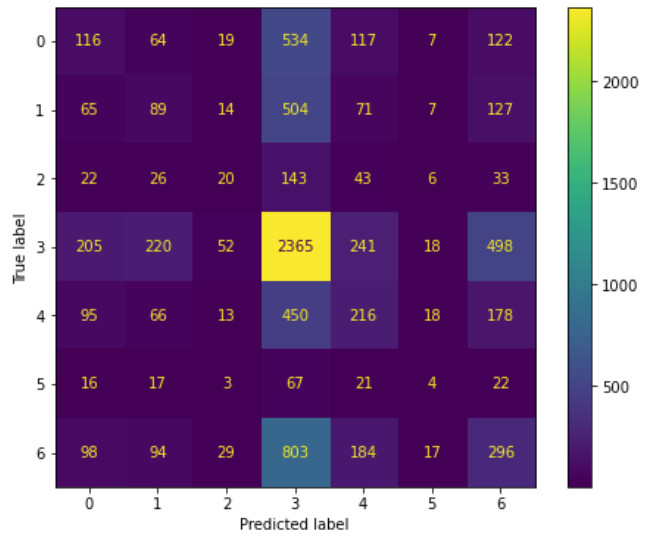

The 3 models on default parameter settings have fairly similar accuracy scores, however their confusion matrix shows that they arrived at that score differently. The Logistic Regression model arrived at a score very similar to that of the dummy classifier (set to predict the most_common label), by overwhelmingly predicting the most common label. The dt and rf models both showed a much more balanced set of predictions but with lower accuracy scores.

### Gradient Boosting Classifier
*Accuracy: 43.7%*

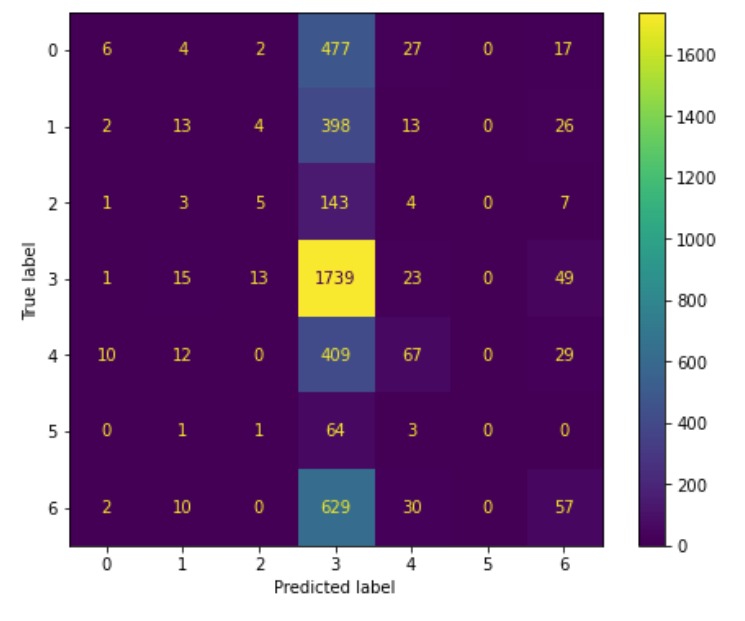

# Metrics

> Metrics used weighted averages


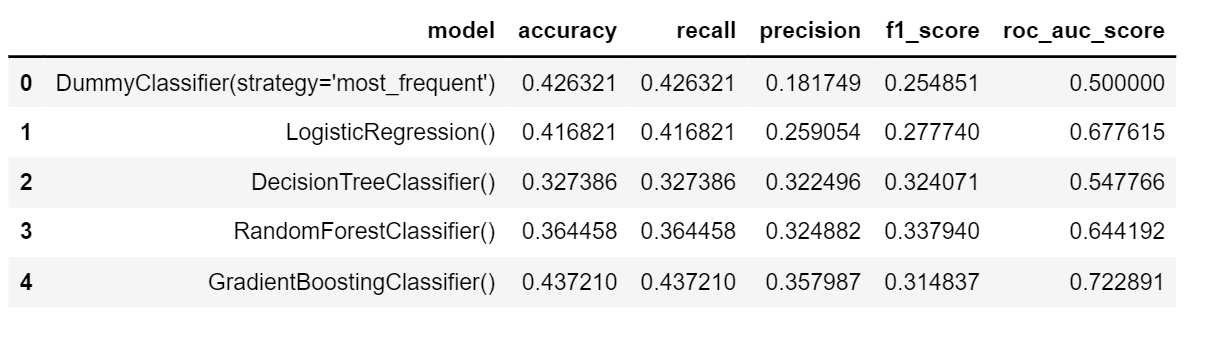

### Remarks on Model Performance


Out of the box, the gradient boosting classifier performed best, being the only to break 43%. The decision tree and random forest both had a much more diverse, if less accurate prediction set.

The F1 scores were better on the decision tree and random forest models. Precision also offered insight into the differences between the models' predictions, punishing the frequency of incorrectly predicting a pitch (False Positive).
The logistic regression and gradient boosting models both predicted the four seam fastball an overwhelming majority of the time, similar to that of the dummy classifier.

Another notable difference in the performance of the various classifiers was the entire final distribution of the predictions. Some models, such as the logistic regression classifier and dummy classifier had a better pitch by pitch accuracy but has a distribution very unrepresentative of the target distribution (as they predicted a fastball nearly all the time). Others, such as the decision tree and random forest models had a lower pitch by pitch accuracy, but had a final distribution much closer to the reality. This is illustrated in the confusion matricies generated.


# Hyperparameter Tuning

### SMOTE & Undersampling


At this point, we looked to improve our model using sampling methods (SMOTE and undersampling) to train our model on a more evenly distributed set of data. 

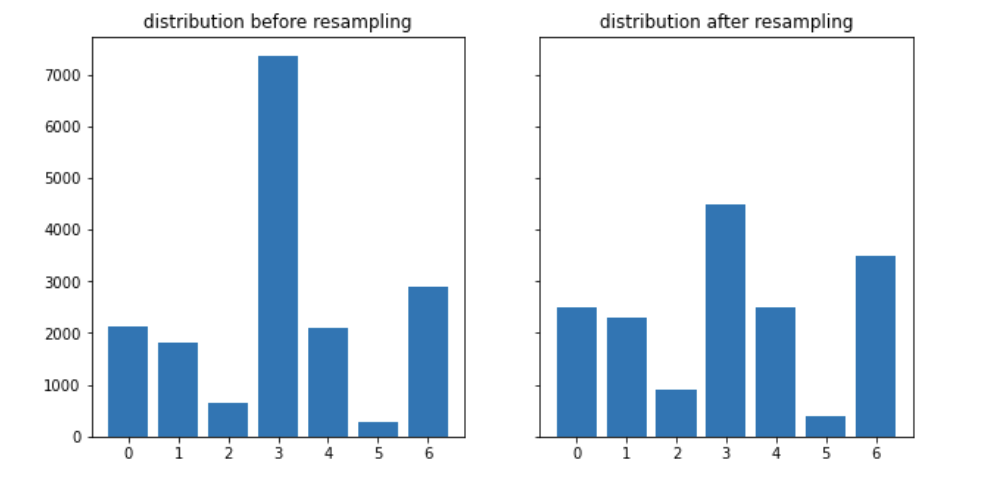


Ultimately, neither stratgey yielded success, with all attempts to change the sampling actually decreasing model performance, and hyperparameter tuning making a negligible difference on predicting our test set. Because none of the initial models showed promising metrics, in a practical setting it would probably be more wise to consider changing the scenario/question being asked in the first place.


### Remarks

Baseball is among the most data driven sports in the world, with teams full of analysts and sabermatricians. 

>Some problems data has certainly helped with, such as shifting defenders depending on where hitters tend to hit the ball. It is kind of telling that even in this modern era of analytics, a team found tremendous success using a cheating scandal that involved banging a trashcan to signal hitters. 

Another complication is that any given at bat should almost be treated like a time series, because pitches don’t happen in a vacuum. What a pitcher throws is also impacted by what pitches the hitter has already seen, something that wasn’t explicity accounted for in this project. 

Despite this, the techniques employed provided valuable experience building a machine learning model from the ground up, and while the metrics weren’t the strongest for our target feature here, it wouldn’t be surprising that a similar approach with a different data set would yield much stronger findings.




### Potential Future Improvements

Ideally, it would make more sense to build a model for each individual pitcher, potentially adding levels of specificity a priori (individual matchups, righties vs lefties etc).

>Trying to evaluate pitchers in the aggregate was really only done for the sake of computational benefit.



### ( Real Conclusion )

*Teams should go back to using the trashcan, because I can't help them.*


Thank you for reading!